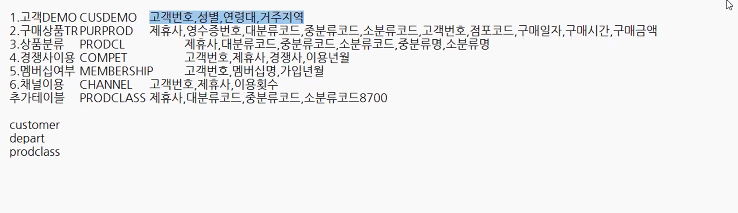

# 피클파일 만들어서 사용하세오
* 용량 커서 못올림,,

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import math
import time

In [2]:
# 한글폰트 적용
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc("font",family="AppleGothic")
import seaborn as sns
from datetime import datetime as dt

#마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus']=False

In [3]:
competitor = pd.read_csv('./DATA/경쟁사이용.txt', encoding='euc-kr', sep=',')
demo = pd.read_csv('./DATA/고객DEMO.txt', encoding='euc-kr', sep=',')
membership = pd.read_csv('./DATA/멤버십여부.txt', encoding='euc-kr', sep=',')
procl = pd.read_csv('./DATA/상품분류.txt', encoding='euc-kr', sep=',')
channel = pd.read_csv('./DATA/채널이용.txt', encoding='euc-kr', sep=',')
purprd = pd.read_csv('./DATA/구매상품TR.txt', encoding='euc-kr', sep=',')

#new = pd.merge(purprd, demo, on="고객번호", how='left')
#new.head()

In [4]:
new = pd.merge(purprd, demo, on="고객번호", how='left')
pd.to_pickle(new,'./new.pkl')

In [7]:
#new = pd.read_pickle('./new.pkl')

In [7]:
new = pd.read_pickle('./new.pkl')
new.head()

MemoryError: 

In [3]:
new_datetime = pd.read_pickle('./new_datetime.pkl')
new_datetime.head()

,영수증번호,고객번호,제휴사,대분류코드,중분류코드,소분류코드,점포코드,성별,연령대,거주지역,구매일자,구매일자(datetime),구매년도,구매월,분기,구매주차,구매요일,구매시간,구매금액
0,8664000,17218,B,15,1504,B150401,44,F,50세~54세,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,20,2420
1,8664000,17218,B,16,1601,B160101,44,F,50세~54세,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,20,1070
2,8664000,17218,B,16,1602,B160201,44,F,50세~54세,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,20,8060
3,8664000,17218,B,18,1803,B180301,44,F,50세~54세,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,20,6000
4,8664001,17674,B,5,509,B050901,44,F,35세~39세,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,22,1120


In [4]:
new_datetime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28593030 entries, 0 to 28593029
Data columns (total 19 columns):
 #   Column          Dtype              
---  ------          -----              
 0   영수증번호           int64              
 1   고객번호            int64              
 2   제휴사             object             
 3   대분류코드           int64              
 4   중분류코드           int64              
 5   소분류코드           object             
 6   점포코드            int64              
 7   성별              object             
 8   연령대             object             
 9   거주지역            float64            
 10  구매일자            object             
 11  구매일자(datetime)  datetime64[ns, UTC]
 12  구매년도            int64              
 13  구매월             int64              
 14  분기              int64              
 15  구매주차            int64              
 16  구매요일            object             
 17  구매시간            int64              
 18  구매금액            int64              
dtypes: datetime64[ns, U

In [5]:
new_datetime.isnull().sum()

영수증번호                  0
고객번호                   0
제휴사                    0
대분류코드                  0
중분류코드                  0
소분류코드                  0
점포코드                   0
성별                     0
연령대                    0
거주지역              204939
구매일자                   0
구매일자(datetime)         0
구매년도                   0
구매월                    0
분기                     0
구매주차                   0
구매요일                   0
구매시간                   0
구매금액                   0
dtype: int64

In [6]:
new_datetime.dropna(inplace=True)

In [8]:
new_datetime.reset_index(inplace=True)

# 구매일자별 구매금액 그래프

## 구매일자 datetime으로 변환

In [10]:
new['구매일자'] = new['구매일자'].astype(str)

In [11]:
new['구매일자(datetime)'] = pd.to_datetime(new['구매일자'])
new['구매일자(datetime)'] = new['구매일자(datetime)'].dt.tz_localize('UTC')
#new['구매일자(timestamp)'] = dt.strptime(new['구매일자'],'%Y%m%d')
new['구매일자']

0           20140222
1           20140222
2           20140222
3           20140222
4           20140222
              ...   
28593025    20150525
28593026    20150525
28593027    20150525
28593028    20150526
28593029    20150525
Name: 구매일자, Length: 28593030, dtype: object

In [12]:
new['구매일자(datetime)']

0          2014-02-22 00:00:00+00:00
1          2014-02-22 00:00:00+00:00
2          2014-02-22 00:00:00+00:00
3          2014-02-22 00:00:00+00:00
4          2014-02-22 00:00:00+00:00
                      ...           
28593025   2015-05-25 00:00:00+00:00
28593026   2015-05-25 00:00:00+00:00
28593027   2015-05-25 00:00:00+00:00
28593028   2015-05-26 00:00:00+00:00
28593029   2015-05-25 00:00:00+00:00
Name: 구매일자(datetime), Length: 28593030, dtype: datetime64[ns, UTC]

## 구매일자별 구매금액 라인플롯

<AxesSubplot:xlabel='구매일자(datetime)', ylabel='구매금액'>

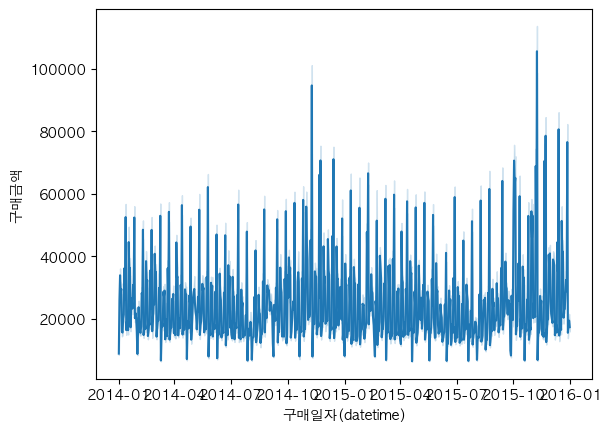

In [12]:
sns.lineplot(data=new,x='구매일자(datetime)',y='구매금액')

<AxesSubplot:xlabel='구매일자(datetime)', ylabel='구매금액'>

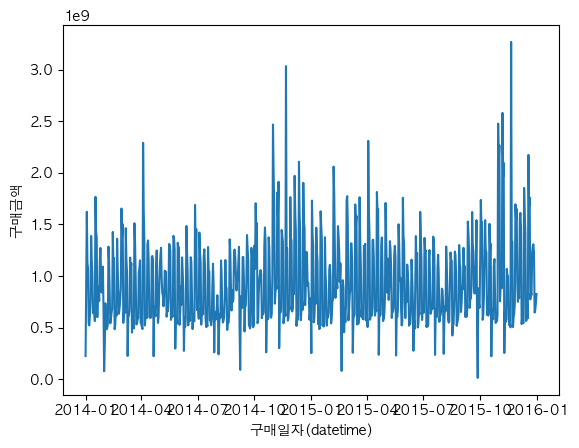

In [13]:
sns.lineplot(data=new,x='구매일자(datetime)',y='구매금액',ci=None, estimator=sum)

### 매출 패턴 인사이트
- 10월~1월 사이에 매출 급상승 구간 : 10.31. 블랙프라이데이로 추측
- 연말~연초 매출 많음

## 구매요일별 구매금액 바플롯

In [13]:
new['구매요일'] = new['구매일자(datetime)'].dt.day_name()

<AxesSubplot:xlabel='구매요일', ylabel='구매금액'>

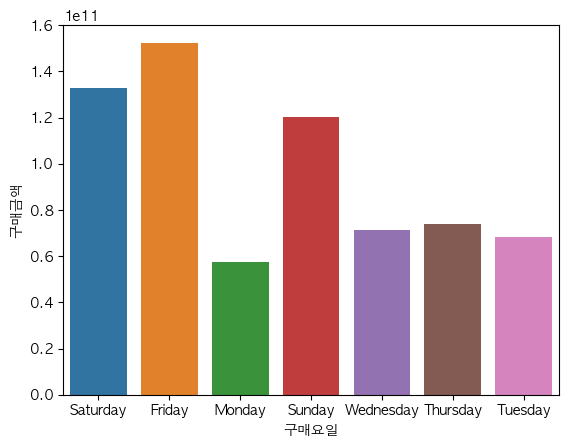

In [15]:
sns.barplot(data=new,x='구매요일',y='구매금액',ci=None, estimator=sum)

### 인사이트
- 요일별 매출 순위 : 금 > 토 > 일 > 목 > 수 > 화 > 월

## 구매주차별 구매금액 라인플롯

In [14]:
new['구매주차'] = new['구매일자(datetime)'].dt.week

<AxesSubplot:xlabel='구매주차', ylabel='구매금액'>

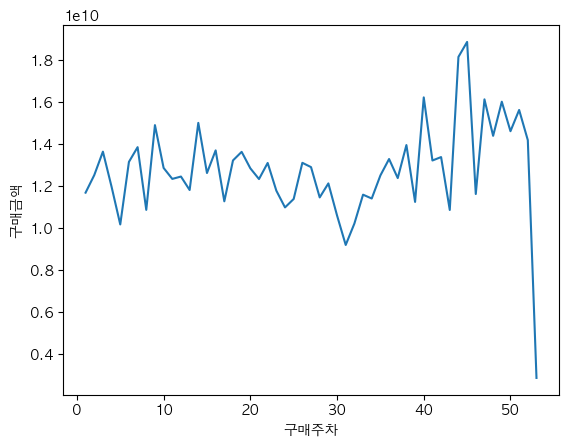

In [21]:
sns.lineplot(data=new,x='구매주차',y='구매금액',ci=None, estimator=sum)

### 인사이트
- 5주정도 단위로 패턴이 있는 것 같음

## 구매년도별 구매금액 포인트플롯

In [15]:
new['구매년도'] = new['구매일자(datetime)'].dt.year

<AxesSubplot:xlabel='구매주차', ylabel='구매금액'>

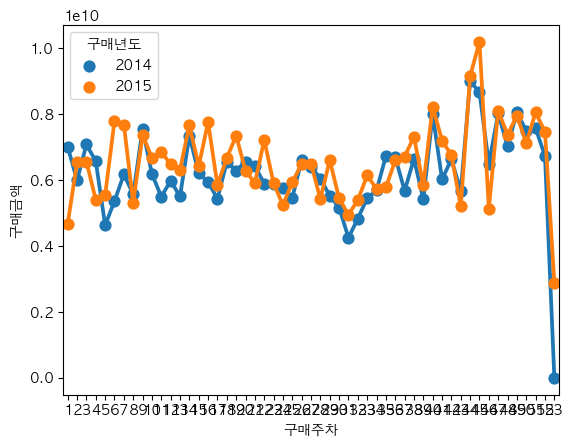

In [19]:
sns.pointplot(data=new, x='구매주차', y='구매금액',ci=None, estimator=sum,hue='구매년도')

<AxesSubplot:xlabel='구매주차', ylabel='구매금액'>

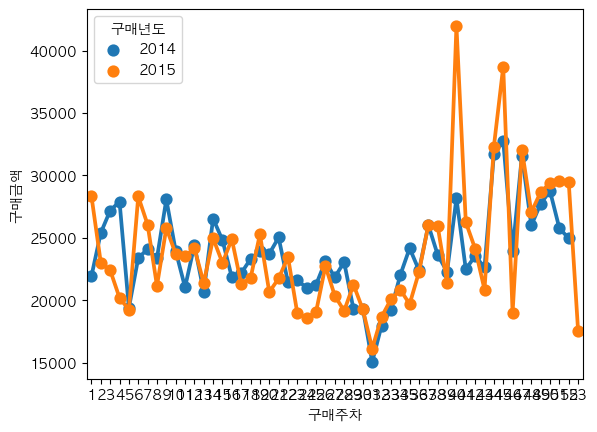

In [16]:
sns.pointplot(data=new, x='구매주차', y='구매금액',ci=None, estimator='mean',hue='구매년도')

### 인사이트
- 갑자기 팍 증가한 부분 블랙프라이데이 구간인듯

<AxesSubplot:xlabel='구매주차', ylabel='구매금액'>

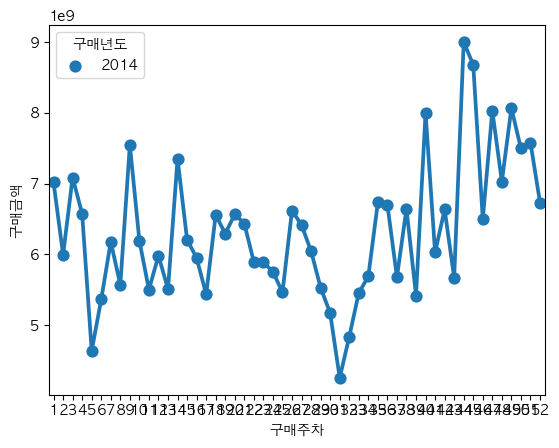

In [30]:
cond1 = (new['구매년도']==2014)
new_2014 = new.loc[cond1]
sns.pointplot(data=new_2014,x='구매주차',y='구매금액',ci=None, estimator=sum,hue='구매년도')

- 분기별로 살펴봐야 할 필요성을 느낌

<AxesSubplot:xlabel='분기', ylabel='구매금액'>

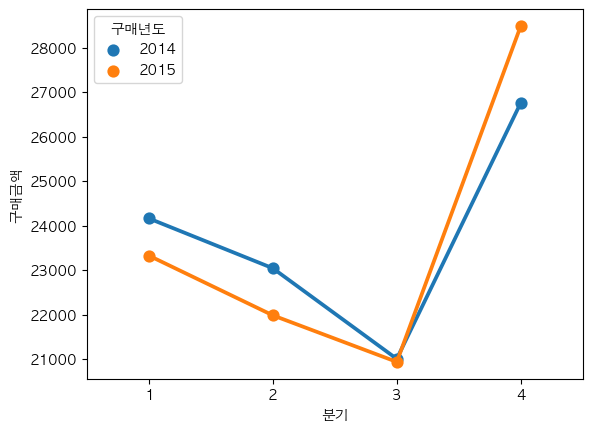

In [35]:
sns.pointplot(data=new_datetime, x='분기', y='구매금액',ci=None, estimator='mean',hue='구매년도')

<AxesSubplot:xlabel='분기', ylabel='구매금액'>

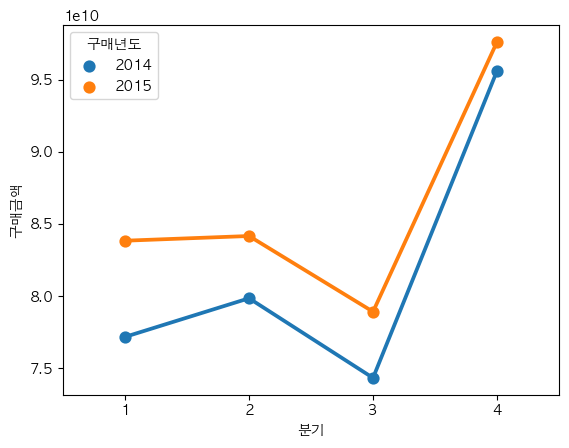

In [37]:
sns.pointplot(data=new_datetime, x='분기', y='구매금액',ci=None, estimator='sum',hue='구매년도')

<AxesSubplot:xlabel='분기', ylabel='구매금액'>

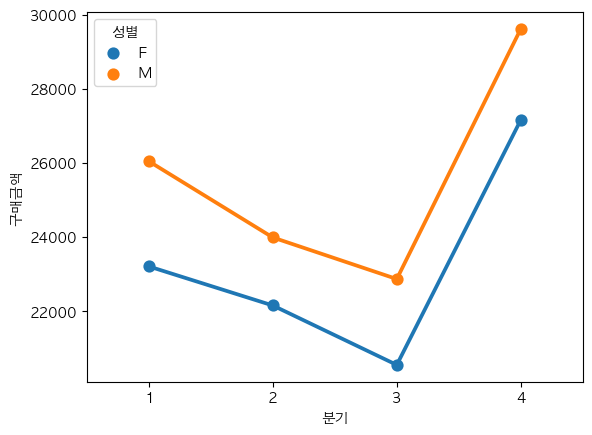

In [36]:
sns.pointplot(data=new_datetime, x='분기', y='구매금액',ci=None, estimator='mean',hue='성별')

<AxesSubplot:xlabel='분기', ylabel='구매금액'>

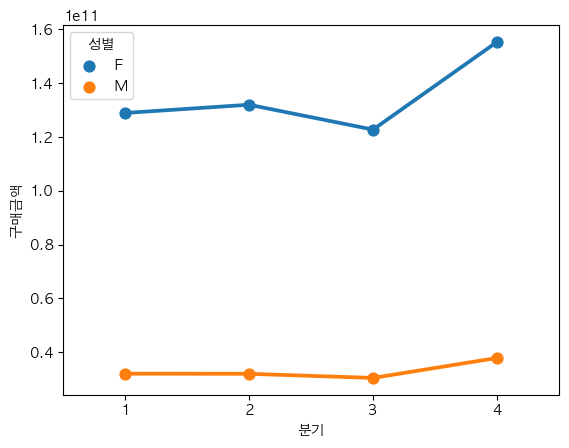

In [38]:
sns.pointplot(data=new_datetime, x='분기', y='구매금액',ci=None, estimator='sum',hue='성별')

### 인사이트
- 분기별 분석
- 왜 3분기에 똑 떨어지나?

<AxesSubplot:xlabel='구매주차', ylabel='구매금액'>

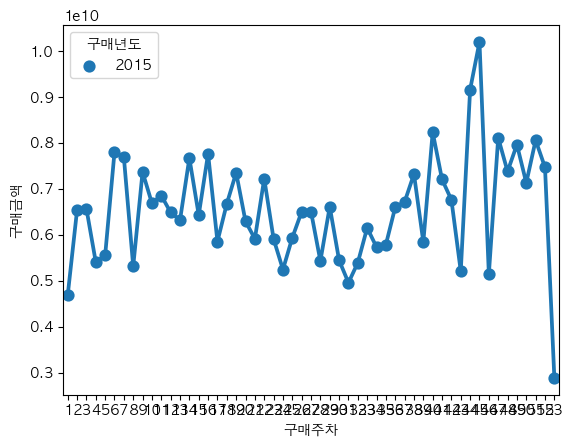

In [31]:
cond1 = (new['구매년도']==2015)
new_2015 = new.loc[cond1]
sns.pointplot(data=new_2015,x='구매주차',y='구매금액',ci=None, estimator=sum,hue='구매년도')

## 구매시간별 구매금액

<AxesSubplot:xlabel='구매시간', ylabel='구매금액'>

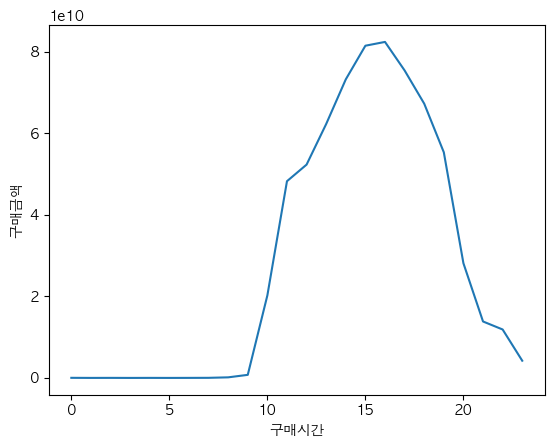

In [29]:
sns.lineplot(data=new,x='구매시간',y='구매금액',ci=None, estimator=sum)

<AxesSubplot:xlabel='구매시간', ylabel='구매금액'>

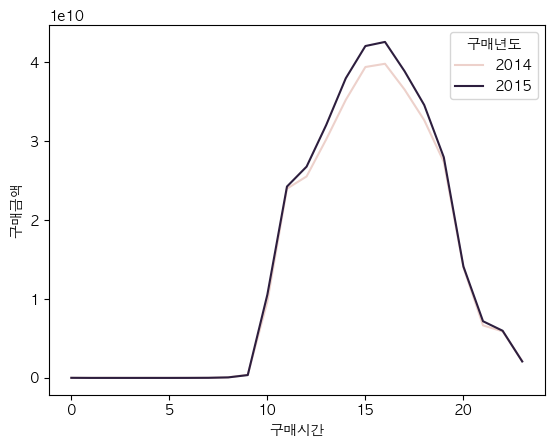

In [32]:
sns.lineplot(data=new,x='구매시간',y='구매금액',ci=None, estimator=sum,hue='구매년도')

### 인사이트
- 9시부터 상승, 20시 찍고 내려옴
- 16~17시 정도가 피크타임

In [128]:
new['구매월'] = new['구매일자(datetime)'].dt.month

In [129]:
new['구매월']

0           2
1           2
2           2
3           2
4           2
           ..
28593025    5
28593026    5
28593027    5
28593028    5
28593029    5
Name: 구매월, Length: 28593030, dtype: int64

In [130]:
def quarterYear(month):
    return math.ceil( month / 3.0 )

In [131]:
new['분기'] = new['구매월'].apply(quarterYear)

In [132]:
new['분기']

0           1
1           1
2           1
3           1
4           1
           ..
28593025    2
28593026    2
28593027    2
28593028    2
28593029    2
Name: 분기, Length: 28593030, dtype: int64

## 피클로 저장

In [133]:
new.head()

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역,구매일자(datetime),구매요일,구매주차,구매년도,구매월,분기
0,B,8664000,15,1504,B150401,17218,44,20140222,20,2420,F,50세~54세,100.0,2014-02-22 00:00:00+00:00,Saturday,8,2014,2,1
1,B,8664000,16,1601,B160101,17218,44,20140222,20,1070,F,50세~54세,100.0,2014-02-22 00:00:00+00:00,Saturday,8,2014,2,1
2,B,8664000,16,1602,B160201,17218,44,20140222,20,8060,F,50세~54세,100.0,2014-02-22 00:00:00+00:00,Saturday,8,2014,2,1
3,B,8664000,18,1803,B180301,17218,44,20140222,20,6000,F,50세~54세,100.0,2014-02-22 00:00:00+00:00,Saturday,8,2014,2,1
4,B,8664001,5,509,B050901,17674,44,20140222,22,1120,F,35세~39세,100.0,2014-02-22 00:00:00+00:00,Saturday,8,2014,2,1


In [21]:
new_datetime = new_datetime[['영수증번호','고객번호','제휴사','대분류코드','중분류코드','소분류코드','점포코드','성별','연령대','거주지역'
          ,'구매일자','구매일자(datetime)','구매년도','구매월','분기','구매주차','구매요일','구매시간','구매금액']]

In [22]:
new_datetime.head()

,영수증번호,고객번호,제휴사,대분류코드,중분류코드,소분류코드,점포코드,성별,연령대,거주지역,구매일자,구매일자(datetime),구매년도,구매월,분기,구매주차,구매요일,구매시간,구매금액
0,8664000,17218,B,15,1504,B150401,44,F,50세~54세,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,20,2420
1,8664000,17218,B,16,1601,B160101,44,F,50세~54세,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,20,1070
2,8664000,17218,B,16,1602,B160201,44,F,50세~54세,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,20,8060
3,8664000,17218,B,18,1803,B180301,44,F,50세~54세,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,20,6000
4,8664001,17674,B,5,509,B050901,44,F,35세~39세,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,22,1120


In [24]:
new_datetime = pd.read_pickle('./new_datetime.pkl')
new_datetime.head()

,영수증번호,고객번호,제휴사,대분류코드,중분류코드,소분류코드,점포코드,성별,연령대,거주지역,구매일자,구매일자(datetime),구매년도,구매월,분기,구매주차,구매요일,구매시간,구매금액
0,8664000,17218,B,15,1504,B150401,44,F,50세~54세,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,20,2420
1,8664000,17218,B,16,1601,B160101,44,F,50세~54세,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,20,1070
2,8664000,17218,B,16,1602,B160201,44,F,50세~54세,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,20,8060
3,8664000,17218,B,18,1803,B180301,44,F,50세~54세,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,20,6000
4,8664001,17674,B,5,509,B050901,44,F,35세~39세,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,22,1120


# 제품별 살펴보기

In [28]:
procl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4386 entries, 0 to 4385
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제휴사     4386 non-null   object
 1   대분류코드   4386 non-null   int64 
 2   중분류코드   4386 non-null   int64 
 3   소분류코드   4386 non-null   object
 4   중분류명    4386 non-null   object
 5   소분류명    4386 non-null   object
dtypes: int64(2), object(4)
memory usage: 205.7+ KB


In [29]:
procl.head()

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명
0,A,1,101,A010101,일용잡화,위생세제
1,A,1,101,A010102,일용잡화,휴지류
2,A,1,101,A010103,일용잡화,뷰티상품
3,A,1,101,A010104,일용잡화,일용잡화
4,A,1,101,A010105,일용잡화,세트상품


In [25]:
new_datetime.head()

,영수증번호,고객번호,제휴사,대분류코드,중분류코드,소분류코드,점포코드,성별,연령대,거주지역,구매일자,구매일자(datetime),구매년도,구매월,분기,구매주차,구매요일,구매시간,구매금액
0,8664000,17218,B,15,1504,B150401,44,F,50세~54세,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,20,2420
1,8664000,17218,B,16,1601,B160101,44,F,50세~54세,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,20,1070
2,8664000,17218,B,16,1602,B160201,44,F,50세~54세,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,20,8060
3,8664000,17218,B,18,1803,B180301,44,F,50세~54세,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,20,6000
4,8664001,17674,B,5,509,B050901,44,F,35세~39세,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,22,1120


In [30]:
all_df = pd.merge(left=new_datetime, right=procl, how='left', on=['제휴사','대분류코드','중분류코드','소분류코드'], sort=False)
all_df.head()

,영수증번호,고객번호,제휴사,대분류코드,중분류코드,소분류코드,점포코드,성별,연령대,거주지역,...,구매일자(datetime),구매년도,구매월,분기,구매주차,구매요일,구매시간,구매금액,중분류명,소분류명
0,8664000,17218,B,15,1504,B150401,44,F,50세~54세,100.0,...,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,20,2420,탄산음료,사이다
1,8664000,17218,B,16,1601,B160101,44,F,50세~54세,100.0,...,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,20,1070,소주,병소주
2,8664000,17218,B,16,1602,B160201,44,F,50세~54세,100.0,...,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,20,8060,맥주,국산맥주
3,8664000,17218,B,18,1803,B180301,44,F,50세~54세,100.0,...,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,20,6000,생리대,생리대
4,8664001,17674,B,5,509,B050901,44,F,35세~39세,100.0,...,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,22,1120,친환경채소,친환경쌈채소


In [31]:
all_df = all_df[['영수증번호','고객번호','제휴사','대분류코드','중분류코드','중분류명','소분류코드','소분류명','점포코드',
                 '성별','연령대','거주지역','구매일자','구매일자(datetime)','구매년도','구매월','분기','구매주차','구매요일',
                 '구매시간','구매금액']]
all_df.head()

,영수증번호,고객번호,제휴사,대분류코드,중분류코드,중분류명,소분류코드,소분류명,점포코드,성별,...,거주지역,구매일자,구매일자(datetime),구매년도,구매월,분기,구매주차,구매요일,구매시간,구매금액
0,8664000,17218,B,15,1504,탄산음료,B150401,사이다,44,F,...,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,20,2420
1,8664000,17218,B,16,1601,소주,B160101,병소주,44,F,...,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,20,1070
2,8664000,17218,B,16,1602,맥주,B160201,국산맥주,44,F,...,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,20,8060
3,8664000,17218,B,18,1803,생리대,B180301,생리대,44,F,...,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,20,6000
4,8664001,17674,B,5,509,친환경채소,B050901,친환경쌈채소,44,F,...,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,22,1120


## 피클로 저장

In [32]:
pd.to_pickle(all_df,'./all_df.pkl')

In [33]:
all_df = pd.read_pickle('./all_df.pkl')
all_df.head()

,영수증번호,고객번호,제휴사,대분류코드,중분류코드,중분류명,소분류코드,소분류명,점포코드,성별,...,거주지역,구매일자,구매일자(datetime),구매년도,구매월,분기,구매주차,구매요일,구매시간,구매금액
0,8664000,17218,B,15,1504,탄산음료,B150401,사이다,44,F,...,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,20,2420
1,8664000,17218,B,16,1601,소주,B160101,병소주,44,F,...,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,20,1070
2,8664000,17218,B,16,1602,맥주,B160201,국산맥주,44,F,...,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,20,8060
3,8664000,17218,B,18,1803,생리대,B180301,생리대,44,F,...,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,20,6000
4,8664001,17674,B,5,509,친환경채소,B050901,친환경쌈채소,44,F,...,100.0,20140222,2014-02-22 00:00:00+00:00,2014,2,1,8,Saturday,22,1120


# 중분류별 매출 살펴보기

In [37]:
temp = all_df.groupby('중분류명').sum()
print(temp)

                     영수증번호    대분류코드      중분류코드        고객번호      점포코드     구매시간  \
중분류명                                                                            
BABY/INFANT   130343890925   391508   39165858   165688795    799706   242986   
BOYS 1        178848533031   524446   52626139   218529975   1167708   320822   
BOYS 2         61945269828   184158   18486630    75568269    388323   115660   
DIY욕실용품         1993659188    19866    1987755     2351104     12195     3836   
DVD                8503500       39       3904        8132        38       22   
...                    ...      ...        ...         ...       ...      ...   
훼이셜케어          64715879627   531696   53201824    77461684    379832   139844   
휴대폰용품          12587331052    39704    3985998    14661987     84100    24487   
휴지통            10740712126    25872    2593360    12385740     68277    20859   
흰우유          3708271516143  4377270  439040181  4251951945  21479717  7576413   
히터기              205952937  

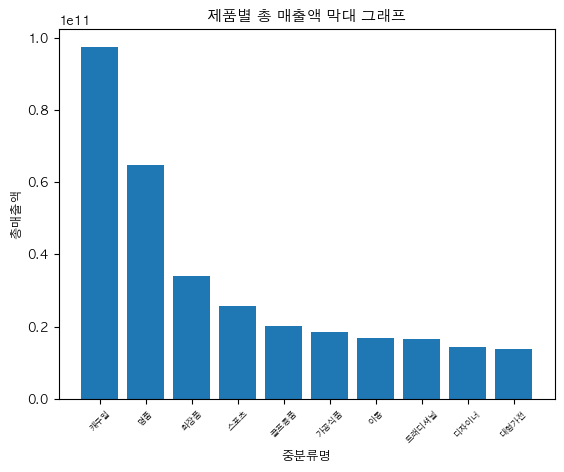

In [106]:
plt.bar(temp.index, temp['구매금액']) 
plt.title('제품별 총 매출액 막대 그래프')
plt.xlabel('중분류명')
plt.ylabel('총매출액')
plt.xticks(fontsize=6, rotation=45)
plt.show()

In [44]:
# 중분류별 구매금액 내림차순
temp['구매금액'].sort_values(ascending=False)

중분류명
캐주얼             97483124440
명품              64602297810
화장품             34088727860
스포츠             25708407210
골프용품            20203314490
                   ...     
온라인양념/뿌리채소             9900
전자악기                   7600
온라인규격/간편조리생선           7500
온라인돼지고기                6500
온라인버섯/열매채소             5900
Name: 구매금액, Length: 717, dtype: int64

In [46]:
temp = temp.sort_values(by='구매금액', ascending=False)
temp = temp.iloc[:10]
temp

,영수증번호,대분류코드,중분류코드,고객번호,점포코드,구매시간,구매금액,거주지역,구매주차,구매년도
중분류명,,,,,,,,,,
캐주얼,1838015678248,2115432,212600916,4316886085,9323630,8131108,97483124440,105907314.0,14377438,1065387714
명품,246181103376,547408,54809226,509812515,1050678,1033947,64602297810,15837642.0,1893693,137847526
화장품,985899136345,949464,95842187,2360165579,8155421,4301834,34088727860,56251554.0,7464345,564170942
스포츠,713036343910,1245408,124748368,1752888882,4084027,3185400,25708407210,47516445.0,5566415,418144896
골프용품,244470316970,422346,42375382,474450658,1221023,1069054,20203314490,15760424.0,1925974,141802843
가공식품,4400581601104,1260715,133635790,10612514462,20920206,19392358,18469825840,222106261.0,33994002,2539730560
아동,609683865624,529386,53115062,1652469610,3504694,2636358,16775759320,41212728.0,4763738,355482873
트래디셔널,249094896974,350530,35294222,565713498,1366676,1126362,16593697340,15697812.0,1900077,149009728
디자이너,80221972217,94864,9699844,133832991,297268,356406,14331569550,3729476.0,629725,47775436


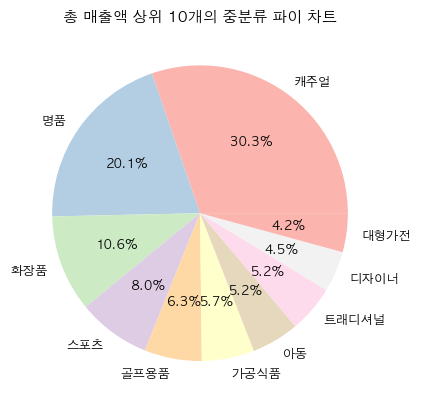

In [88]:
mpl.rcParams['font.size'] = 9
colors=sns.color_palette('Pastel1')
plt.pie(temp['구매금액'], labels=temp.index, autopct='%.1f%%',colors=colors)
plt.title('총 매출액 상위 10개의 중분류 파이 차트')
plt.show()

### 인사이트
- 캐주얼 > 명품 > 화장품 > 스포츠 > 골프용품 > 가공식품 > 아동 > 트래디셔널 > 디자이너 > 대형가전

# 제휴사 중심 분석

https://0goodmorning.tistory.com/42

TypeError: 'AxesSubplot' object is not subscriptable

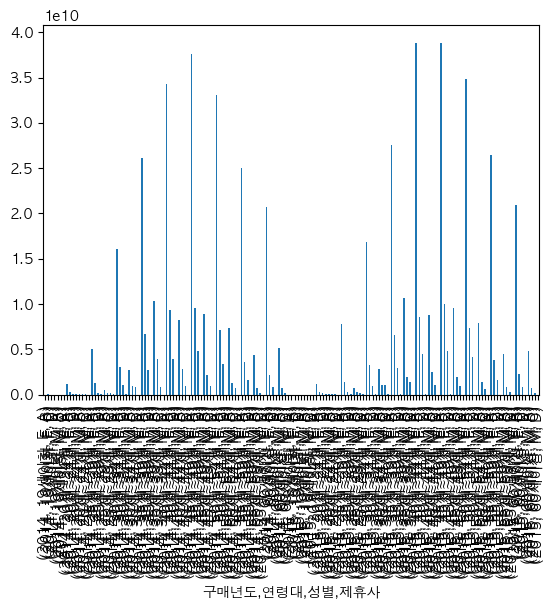

In [44]:
# '구매년도','연령대','성별','제휴사'별 구매금액
plt.xticks(rotation=90)
sum_stores = all_df.groupby(['구매년도','연령대','성별','제휴사'])['구매금액'].sum()
sns.barplot(sum_stores.plot(kind='bar'))

In [115]:
sum_stores = all_df.groupby(['연령대','성별','제휴사']).sum()

In [116]:
sum_stores

영수증번호    대분류코드      중분류코드        고객번호      점포코드  \
연령대   성별 제휴사                                                            
19세이하 F  A       3816944833     1712     175978    18229673     11761   
         B      59743472934   225282   22554987   132853199    333665   
         C      30767203378    28738    2884351    60409231   1446982   
         D        140221376     2628     264206    12798277      8567   
      M  A        514024658      355      35960     2601414      2706   
...                     ...      ...        ...         ...       ...   
60세이상 F  D        180774432     2982     299961     2878362     13641   
      M  A     317939963363   211662   21564328   356157181   1234041   
         B    1172806405571  4811891  481731251  1013646696   5848754   
         C     348518618943   601191   60330727   652218730  12202609   
         D         69289419     1243     124905     1852973      4703   

                 구매시간         구매금액        거주지역     구매주차       구매년도  
연령대   성별 제휴사                                                        
19세이하 F  A      15789     33090930    252665.0    30622    2028683  
         B     114151     49162468   1860334.0   180613   14312487  
         C      58810     10802149   1062020.0    91138    6921950  
         D      12825      5862720    132057.0    21896    1386191  
      M  A       2132      9012160     33523.0     4660     275985  
...               ...          ...         ...      ...        ...  
60세이상 F  D      13910     11991700    103454.0    25735    1748757  
      M  A    1417437  10022267360  14388491.0  2485020  186038786  
         B    2384979   1438557996  24142397.0  3944952  296928229  
         C    1113037    321715216   9736135.0  1808109  137031898  
         D       5451      2286950     36473.0    10447     680916  

[80 rows x 10 columns]

### 매출 상위 10명

In [117]:
sum_stores_h = sum_stores.sort_values(by='구매금액', ascending=False)
sum_stores_h = sum_stores_h.iloc[:10]
sum_stores_h

,,,영수증번호,대분류코드,중분류코드,고객번호,점포코드,구매시간,구매금액,거주지역,구매주차,구매년도
연령대,성별,제휴사,,,,,,,,,,
45세~49세,F,A,3256463896828,2258793,229857557,7132803017,16060939,14761880,76938815870,162142916.0,25335004,1903140946
40세~44세,F,A,2982747446617,2034806,207116089,7484640008,15091229,13199986,73368440050,157255571.0,23102325,1731972301
50세~54세,F,A,2646250743067,1839574,187163041,4706151848,12712566,12035329,68721596820,128039352.0,20538805,1547056533
35세~39세,F,A,2292885683816,1574878,160280952,6827867222,11936201,10083068,54058550700,142884370.0,17884679,1337942921
55세~59세,F,A,1786624220131,1279139,130079453,2594002316,8268790,8096661,51948000150,80119168.0,13901272,1048225285
60세이상,F,A,1525550698258,1026718,104588854,2033345738,5762847,6716269,42569525710,62801786.0,11892887,893713679
30세~34세,F,A,1482786682888,984468,100282929,5074456476,7571885,6594778,33121620150,87755175.0,11512065,858312601
35세~39세,M,A,520010107981,349702,35601932,1806314486,2952901,2288886,21174443930,31832864.0,4045968,301471141
45세~49세,F,B,21653235717256,83563748,8365903716,23641316585,126101429,44887218,19764389913,526880475.0,67989612,5151623235


### 매출 하위 10명

In [118]:
sum_stores_l = sum_stores.sort_values(by='구매금액', ascending=True)
sum_stores_l = sum_stores_l.iloc[:10]
sum_stores_l

,,,영수증번호,대분류코드,중분류코드,고객번호,점포코드,구매시간,구매금액,거주지역,구매주차,구매년도
연령대,성별,제휴사,,,,,,,,,,
19세이하,M,D,37117269,560,56356,3134670,3490,3082,1875940,2145.0,4039,332475
60세이상,M,D,69289419,1243,124905,1852973,4703,5451,2286950,36473.0,10447,680916
19세이하,F,D,140221376,2628,264206,12798277,8567,12825,5862720,132057.0,21896,1386191
50세~54세,M,D,113711809,1949,195901,2328975,10250,8614,6453510,73136.0,15348,1057736
55세~59세,M,D,89634074,1497,150610,2081185,5995,6966,6596110,41926.0,12553,886507
20세~24세,M,D,165114402,2825,284091,12070025,13753,13078,6603710,79060.0,25168,1565312
19세이하,M,A,514024658,355,35960,2601414,2706,2132,9012160,33523.0,4660,275985
45세~49세,M,D,169086262,2739,275486,8265987,15165,13056,9374380,92671.0,21288,1575475
19세이하,M,B,12255865676,46519,4657064,25679380,77037,24103,9894262,144963.0,38548,2711436


## 총 매출액 상위 10개의 연령대-성별-제휴사 파이 차트 그려보기

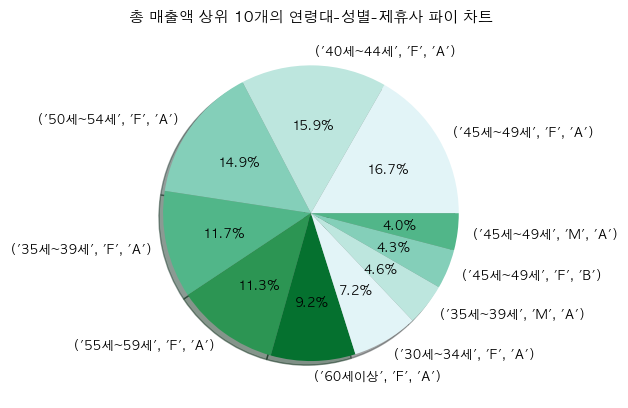

In [119]:
mpl.rcParams['font.size'] = 9
colors=sns.color_palette('BuGn')
plt.pie(sum_stores_h['구매금액'], labels=sum_stores_h.index, autopct='%.1f%%', shadow=True,colors=colors)
plt.title('총 매출액 상위 10개의 연령대-성별-제휴사 파이 차트')
plt.show()

## 총 매출액 하위 10개의 연령대-성별-제휴사 파이 차트 그려보기

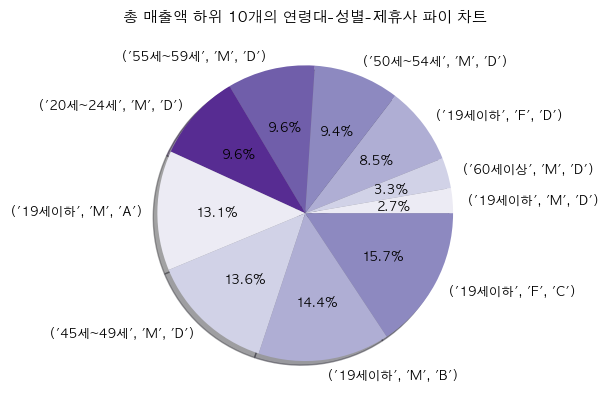

In [122]:
mpl.rcParams['font.size'] = 9
colors=sns.color_palette('Purples')
plt.pie(sum_stores_l['구매금액'], labels=sum_stores_l.index, autopct='%.1f%%', shadow=True,colors=colors)
plt.title('총 매출액 하위 10개의 연령대-성별-제휴사 파이 차트')
plt.show()

### 인사이트
- 35~60세 여성이고 a제휴사 이용 인원이 매출액 상위권
- 45~49세 여성이 매출 상위 탑1인데, 남성은 뒤에서 3등임. 경제권을 여성이 쥐고있는 듯
- 19세 이하 남녀, 연령대가 낮은 사람들 매출 저조
- d 제휴사 이용 인원이 매출액 하위권

## 매출액 1등 그룹 뭐샀나 살펴보기

In [99]:
cond1 = (all_df['제휴사']=='A')
cond2 = (all_df['연령대']=='45세~49세')
cond3 = (all_df['성별']=='F')
all_df_a4f = all_df.loc[cond1 &  cond2 & cond3]

In [100]:
all_df_a4f

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역,구매일자(datetime),구매요일,구매주차,구매년도,중분류명,소분류명
2494,A,1568270,1,102,A010202,12446,31,20140318,15,21740,F,45세~49세,49.0,2014-03-18 00:00:00+00:00,Tuesday,12,2014,육류,돈육
2495,A,1568270,1,103,A010301,12446,31,20140318,15,2370,F,45세~49세,49.0,2014-03-18 00:00:00+00:00,Tuesday,12,2014,축산가공,햄
2496,A,1568270,1,103,A010302,12446,31,20140318,15,1660,F,45세~49세,49.0,2014-03-18 00:00:00+00:00,Tuesday,12,2014,축산가공,유제품
2497,A,1568270,1,104,A010401,12446,31,20140318,15,15960,F,45세~49세,49.0,2014-03-18 00:00:00+00:00,Tuesday,12,2014,농산물,청과
2498,A,1568270,1,106,A010608,12446,31,20140318,15,3150,F,45세~49세,49.0,2014-03-18 00:00:00+00:00,Tuesday,12,2014,가공식품,일반가공식품
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26319561,A,5549723,1,107,A010707,4958,12,20151122,14,2500,F,45세~49세,60.0,2015-11-22 00:00:00+00:00,Sunday,47,2015,젓갈/반찬,어묵
26319562,A,5549723,1,107,A010710,4958,12,20151122,14,7000,F,45세~49세,60.0,2015-11-22 00:00:00+00:00,Sunday,47,2015,젓갈/반찬,즉석반찬
26319563,A,5549723,1,109,A010902,4958,12,20151122,14,1200,F,45세~49세,60.0,2015-11-22 00:00:00+00:00,Sunday,47,2015,주류,음료
26319569,A,5483499,4,402,A040222,4039,2,20151112,16,535000,F,45세~49세,24.0,2015-11-12 00:00:00+00:00,Thursday,46,2015,캐주얼,영 캐릭터


<AxesSubplot:xlabel='중분류명', ylabel='구매금액'>

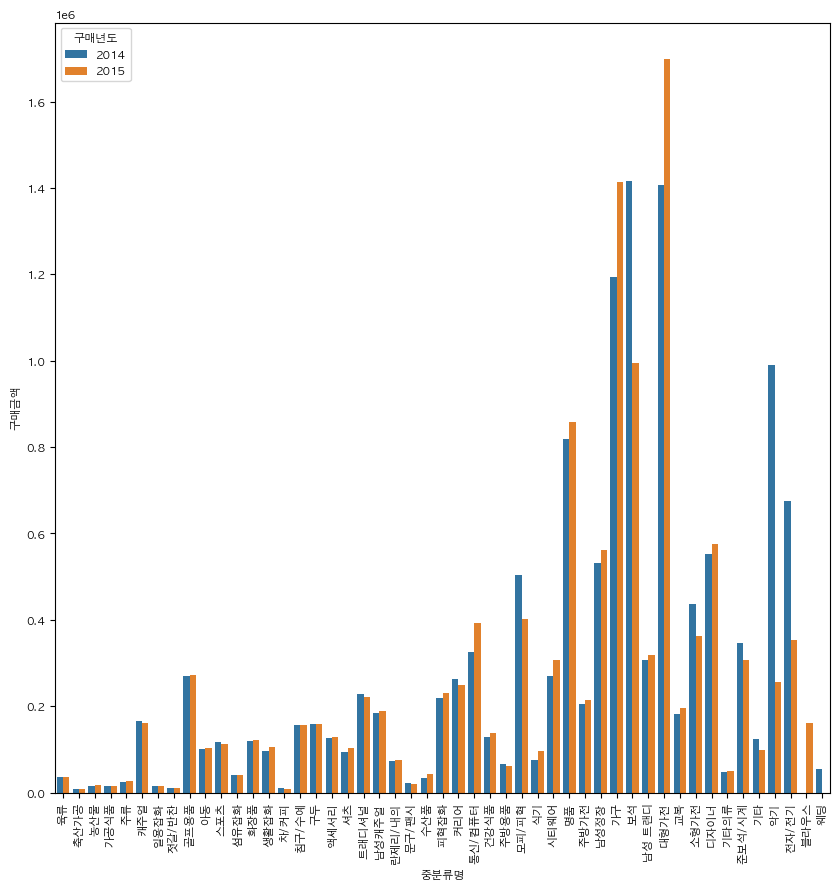

In [114]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
mpl.rcParams['font.size'] = 8
sns.barplot(data=all_df_a4f,x='중분류명',y='구매금액',hue='구매년도',ci=None)

### 인사이트
- 대상 : 45~49세 여성이고 a제휴사 이용 인원 뭐샀나
- 대형가전 > 보석 > 가구

## 제휴사 분석 (b제휴사 중심으로)

In [125]:
# 제휴사별 카운트
all_df.groupby('제휴사').sum()

,영수증번호,대분류코드,중분류코드,고객번호,점포코드,구매시간,구매금액,거주지역,구매주차,구매년도
제휴사,,,,,,,,,,
A,19937901783207,13690704,1393487474,46495675335,95828598,89222613,514841144030,1.041942e+09,154886057,11624326914
B,112957943415684,427529823,42803222849,131877446925,662203669,228281445,111221686478,2.779222e+09,355523321,26869859684
C,51446518220147,83578398,8387052604,103357512995,1878258405,158397749,50060970889,2.052151e+09,249958709,18894547589
D,22087061751,383221,38532101,1463615953,1666475,1784999,895355544,1.324031e+07,3087475,212349749


<AxesSubplot:xlabel='구매주차', ylabel='구매금액'>

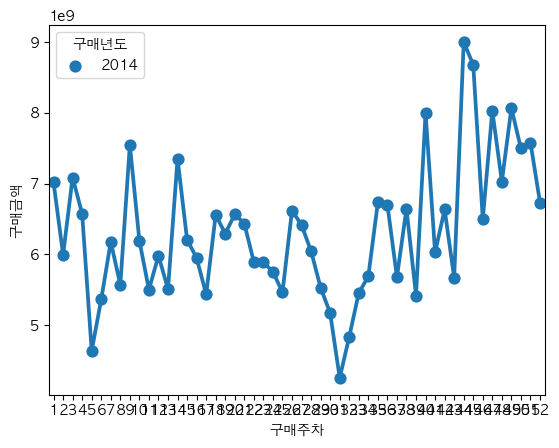

In [30]:
#cond1 = (all_df['제휴사']=='B')
all_df_asso = all_df['제휴사']
sns.pointplot(data=all_df_asso_b,x='구매주차',y='구매금액',ci=None, estimator=sum,hue='구매년도')

- 분기별로 살펴봐야 할 필요성을 느낌

<AxesSubplot:xlabel='구매주차', ylabel='구매금액'>

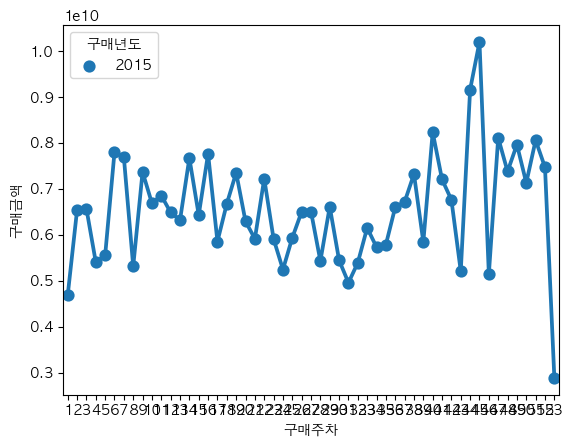

In [31]:
cond1 = (new['구매년도']==2015)
new_2015 = new.loc[cond1]
sns.pointplot(data=new_2015,x='구매주차',y='구매금액',ci=None, estimator=sum,hue='구매년도')

# 거주지역별 살펴보기

<AxesSubplot:xlabel='거주지역', ylabel='구매금액'>

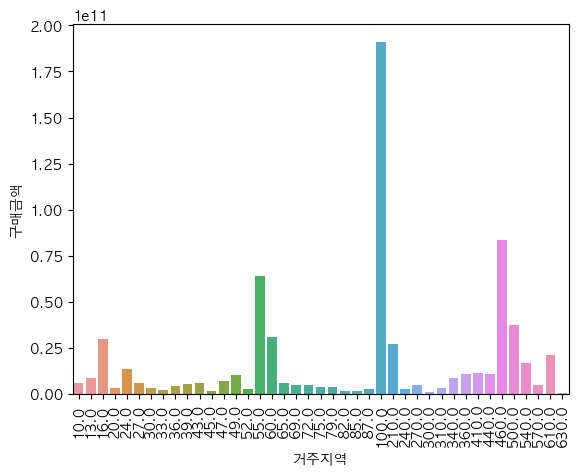

In [39]:
plt.xticks(rotation=90)
sns.barplot(data=new_datetime,x='거주지역',y='구매금액',ci=None, estimator=sum)